In [1]:
## The purpose of this code is to identify the most important features for the machine learning phase.
## The importance weights of the features are calculated based on the attacks.
## This calculation is done using the sklearn RandomForestRegressor.

## Some parts of the code used for the calculation and visualization are adapted from the following source:
## http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

In [4]:
base_path = "/content/drive/MyDrive/Intrusion Detection System/"

In [5]:
#this function creates a folder in the appropriate directory.
def folder(f_name):
    folder_path = os.path.join(base_path, f_name)
    try:
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            print(f"Folder created: {folder_path}")
        else:
            print(f"Folder already exists: {folder_path}")
    except OSError:
        print("The folder could not be created!")


folder("feature_pics")

Folder already exists: /content/drive/MyDrive/Intrusion Detection System/feature_pics


In [6]:
csv_files = os.listdir(os.path.join(base_path, "attacks"))# It creates a list of file names in the "attacks" folder.

In [7]:
# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

Bot importance list:
                             importance
Features                               
Bwd Packet Length Mean         0.358720
Flow IAT Mean                  0.020887
Flow IAT Std                   0.011623
Flow Duration                  0.006158
Flow IAT Min                   0.005194
Flow IAT Max                   0.004397
Flow Bytes/s                   0.002772
Flow Packets/s                 0.000629
Fwd IAT Total                  0.000236
Total Backward Packets         0.000163
Fwd Packet Length Mean         0.000157
Total Length of Fwd Packets    0.000115
Bwd Packet Length Max          0.000105
Total Length of Bwd Packets    0.000098
Bwd Packet Length Std          0.000081
Fwd Packet Length Std          0.000072
Fwd Packet Length Max          0.000063
Total Fwd Packets              0.000051
Bwd Packet Length Min          0.000023
Fwd Packet Length Min          0.000000 



Bot=["Bwd Packet Length Mean","Flow IAT Mean","Flow IAT Std","Flow Duration","Flow IAT Min"]


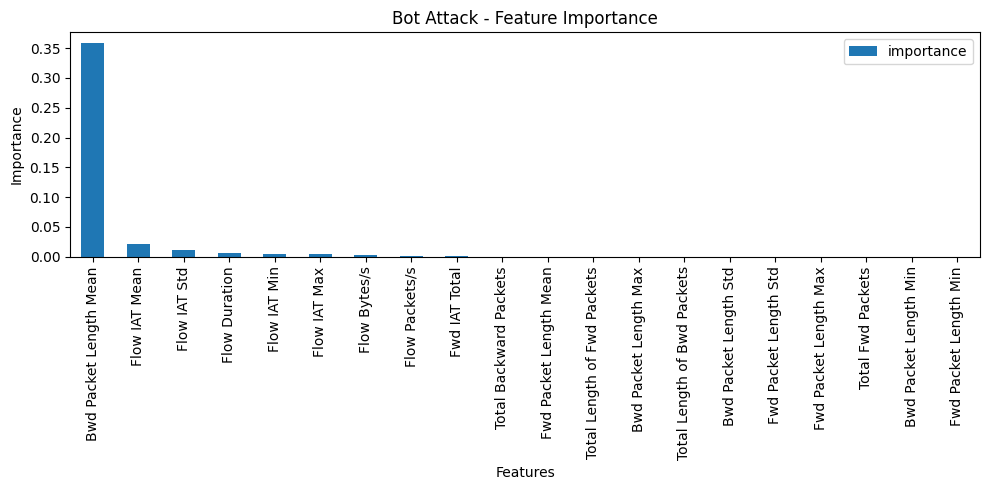

-----------------------------------------------------------------------------------------------




DDoS importance list:
                             importance
Features                               
Bwd Packet Length Std          0.471242
Total Backward Packets         0.093693
Fwd IAT Total                  0.008631
Flow Duration                  0.007478
Total Length of Fwd Packets    0.007462
Flow IAT Min                   0.005934
Flow IAT Std                   0.005728
Flow IAT Mean                  0.005623
Flow IAT Max                   0.004884
Flow Bytes/s                   0.004101
Fwd Packet Length Max          0.001879
Fwd Packet Length Std          0.001713
Flow Packets/s                 0.000987
Bwd Packet Length Max          0.000573
Bwd Packet Length Min          0.000393
Total Length of Bwd Packets    0.000216
Bwd Packet Length Mean         0.000190
Fwd Packet Length Mean         0.000093
Total Fwd Packets              0.000049
Fwd Packet Length Min          0.00001

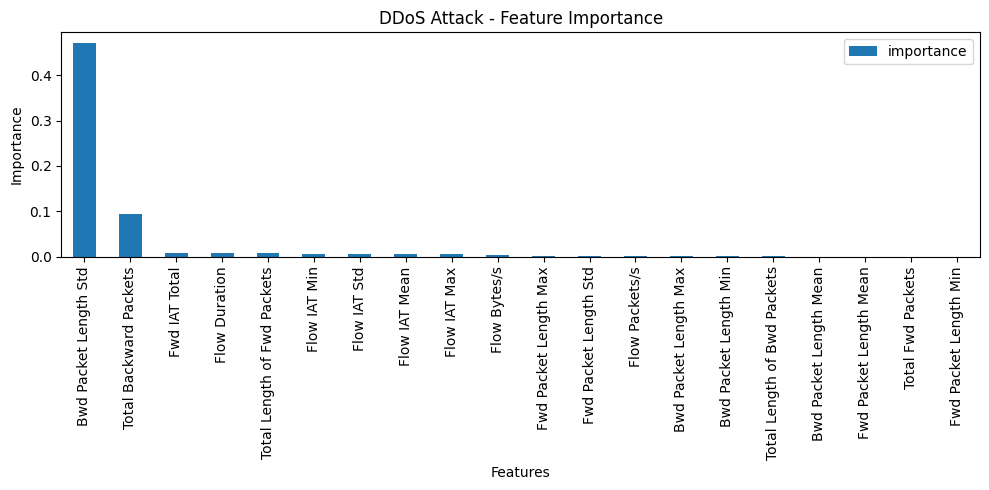

-----------------------------------------------------------------------------------------------




DoS GoldenEye importance list:
                             importance
Features                               
Bwd Packet Length Std          0.275053
Flow IAT Max                   0.252899
Flow IAT Min                   0.139121
Total Backward Packets         0.022060
Flow IAT Mean                  0.017700
Flow IAT Std                   0.004952
Fwd Packet Length Min          0.003202
Fwd Packet Length Max          0.001010
Fwd IAT Total                  0.000800
Flow Duration                  0.000735
Bwd Packet Length Mean         0.000641
Flow Packets/s                 0.000605
Flow Bytes/s                   0.000556
Total Length of Fwd Packets    0.000295
Total Length of Bwd Packets    0.000192
Fwd Packet Length Mean         0.000170
Bwd Packet Length Max          0.000161
Bwd Packet Length Min          0.000039
Total Fwd Packets              0.000017
Fwd Packet Length Std        

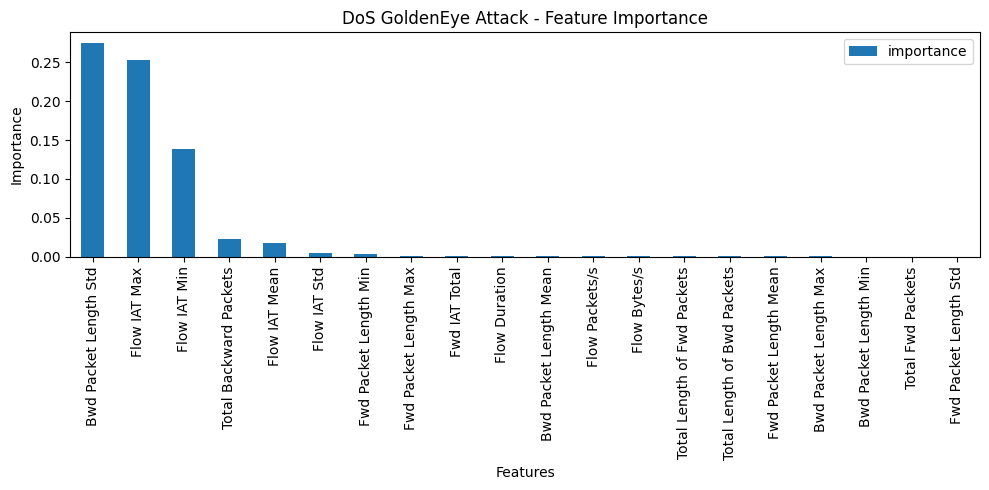

-----------------------------------------------------------------------------------------------




DoS Hulk importance list:
                               importance
Features                                 
Bwd Packet Length Std        5.154634e-01
Fwd Packet Length Std        7.065437e-02
Fwd Packet Length Max        6.532457e-03
Flow IAT Min                 1.927912e-03
Flow Duration                1.921173e-03
Total Backward Packets       3.334907e-04
Fwd IAT Total                2.072461e-04
Flow IAT Max                 1.829395e-04
Total Length of Bwd Packets  1.113116e-04
Flow Packets/s               8.852040e-05
Flow IAT Mean                8.190536e-05
Flow IAT Std                 4.830606e-05
Bwd Packet Length Mean       4.203382e-05
Flow Bytes/s                 3.196686e-05
Bwd Packet Length Max        1.309357e-05
Fwd Packet Length Mean       1.098004e-05
Total Fwd Packets            8.945968e-06
Bwd Packet Length Min        7.813427e-06
Total Length of Fwd Packets  5.908

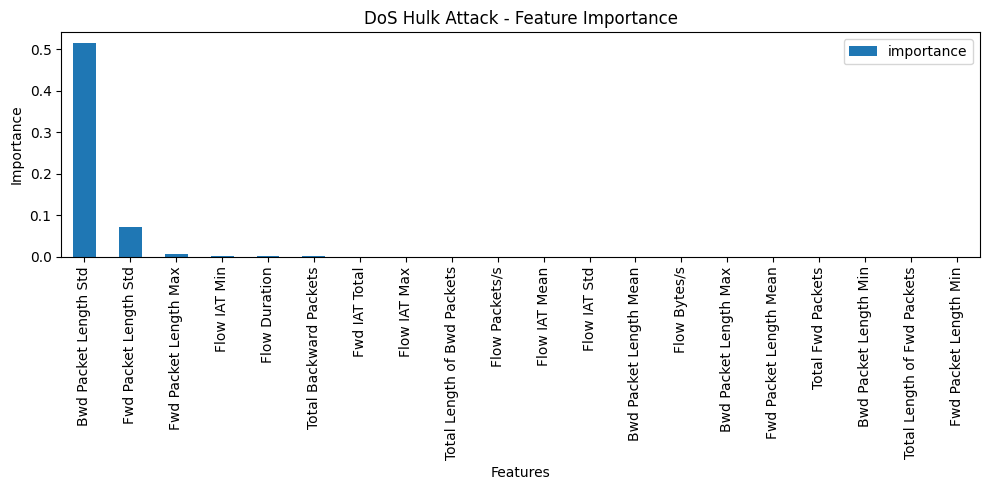

-----------------------------------------------------------------------------------------------




DoS Slowhttptest importance list:
                             importance
Features                               
Flow IAT Mean                  0.646424
Fwd Packet Length Min          0.091681
Bwd Packet Length Mean         0.035158
Fwd Packet Length Std          0.013278
Fwd Packet Length Mean         0.012482
Bwd Packet Length Std          0.009523
Total Length of Bwd Packets    0.004458
Bwd Packet Length Max          0.003302
Flow IAT Min                   0.001789
Fwd Packet Length Max          0.000912
Bwd Packet Length Min          0.000805
Total Length of Fwd Packets    0.000781
Flow Bytes/s                   0.000484
Flow Duration                  0.000389
Flow IAT Max                   0.000353
Total Backward Packets         0.000302
Fwd IAT Total                  0.000298
Flow IAT Std                   0.000297
Total Fwd Packets              0.000217
Flow Packets/s            

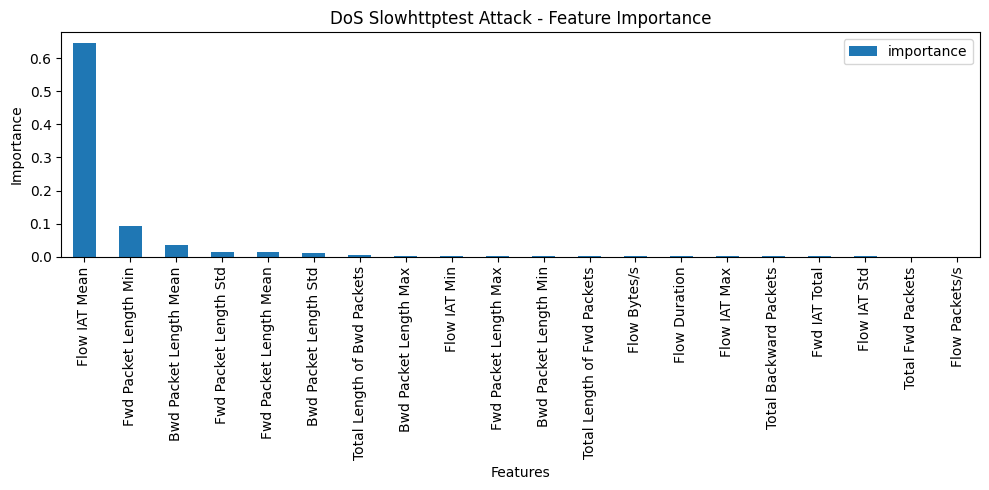

-----------------------------------------------------------------------------------------------




DoS slowloris importance list:
                             importance
Features                               
Flow IAT Mean                  0.481473
Bwd Packet Length Mean         0.128815
Total Fwd Packets              0.023606
Fwd IAT Total                  0.000896
Fwd Packet Length Std          0.000775
Fwd Packet Length Max          0.000721
Total Length of Fwd Packets    0.000684
Bwd Packet Length Std          0.000640
Bwd Packet Length Max          0.000634
Total Length of Bwd Packets    0.000577
Total Backward Packets         0.000565
Fwd Packet Length Mean         0.000537
Flow Duration                  0.000507
Flow IAT Max                   0.000478
Flow IAT Min                   0.000436
Flow Bytes/s                   0.000355
Flow IAT Std                   0.000336
Fwd Packet Length Min          0.000287
Flow Packets/s                 0.000130
Bwd Packet Length Min        

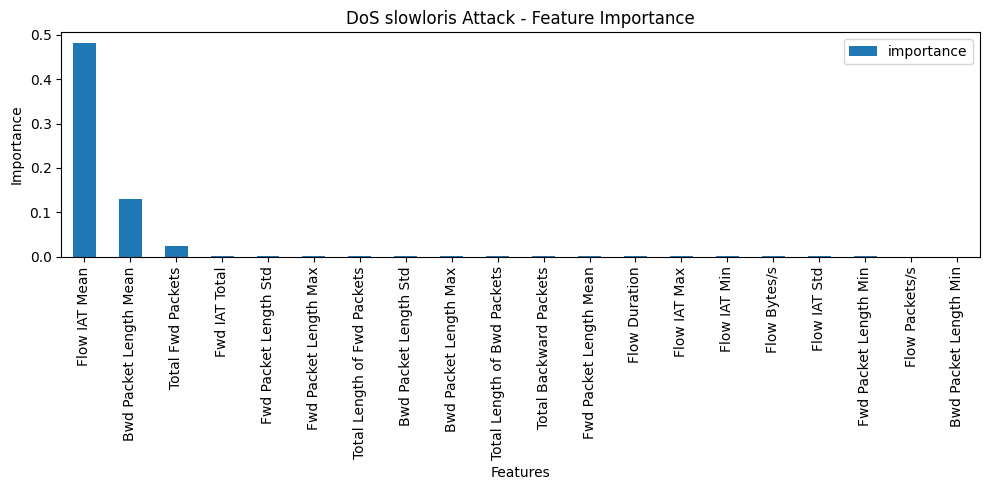

-----------------------------------------------------------------------------------------------




FTP-Patator importance list:
                             importance
Features                               
Fwd Packet Length Max          0.034046
Fwd Packet Length Std          0.019414
Fwd Packet Length Mean         0.008534
Bwd Packet Length Mean         0.000822
Bwd Packet Length Std          0.000516
Total Length of Bwd Packets    0.000489
Flow IAT Min                   0.000295
Bwd Packet Length Max          0.000159
Flow Duration                  0.000107
Flow IAT Max                   0.000097
Total Length of Fwd Packets    0.000076
Flow IAT Std                   0.000066
Flow IAT Mean                  0.000057
Fwd IAT Total                  0.000054
Total Fwd Packets              0.000047
Total Backward Packets         0.000046
Flow Packets/s                 0.000045
Fwd Packet Length Min          0.000038
Flow Bytes/s                   0.000029
Bwd Packet Length Min          

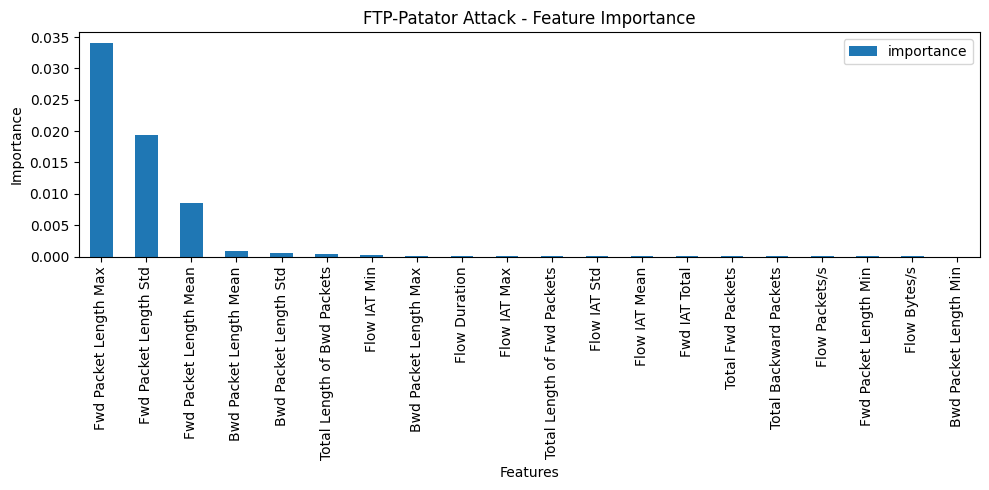

-----------------------------------------------------------------------------------------------




Heartbleed importance list:
                             importance
Features                               
Bwd Packet Length Max             0.060
Total Backward Packets            0.056
Total Length of Bwd Packets       0.052
Total Fwd Packets                 0.052
Bwd Packet Length Mean            0.048
Flow IAT Min                      0.044
Total Length of Fwd Packets       0.020
Bwd Packet Length Std             0.020
Flow Duration                     0.016
Fwd IAT Total                     0.004
Fwd Packet Length Std             0.000
Fwd Packet Length Mean            0.000
Fwd Packet Length Min             0.000
Flow Bytes/s                      0.000
Flow Packets/s                    0.000
Flow IAT Mean                     0.000
Flow IAT Std                      0.000
Flow IAT Max                      0.000
Fwd Packet Length Max             0.000
Bwd Packet Length Min           

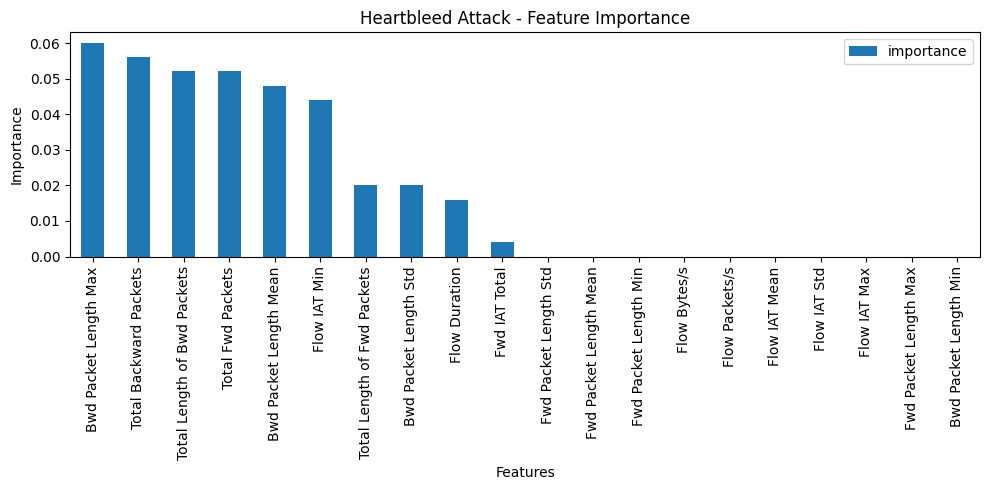

-----------------------------------------------------------------------------------------------




Infiltration importance list:
                             importance
Features                               
Fwd Packet Length Mean         0.107905
Flow Duration                  0.064746
Bwd Packet Length Mean         0.028415
Flow IAT Max                   0.017550
Total Length of Fwd Packets    0.016249
Total Backward Packets         0.015806
Fwd Packet Length Std          0.014478
Fwd IAT Total                  0.012764
Fwd Packet Length Max          0.010152
Flow IAT Mean                  0.009272
Flow IAT Min                   0.005376
Flow Packets/s                 0.004902
Bwd Packet Length Max          0.002980
Bwd Packet Length Std          0.002910
Flow Bytes/s                   0.002842
Fwd Packet Length Min          0.002005
Flow IAT Std                   0.001903
Total Fwd Packets              0.001661
Bwd Packet Length Min          0.001444
Total Length of Bwd Packets   

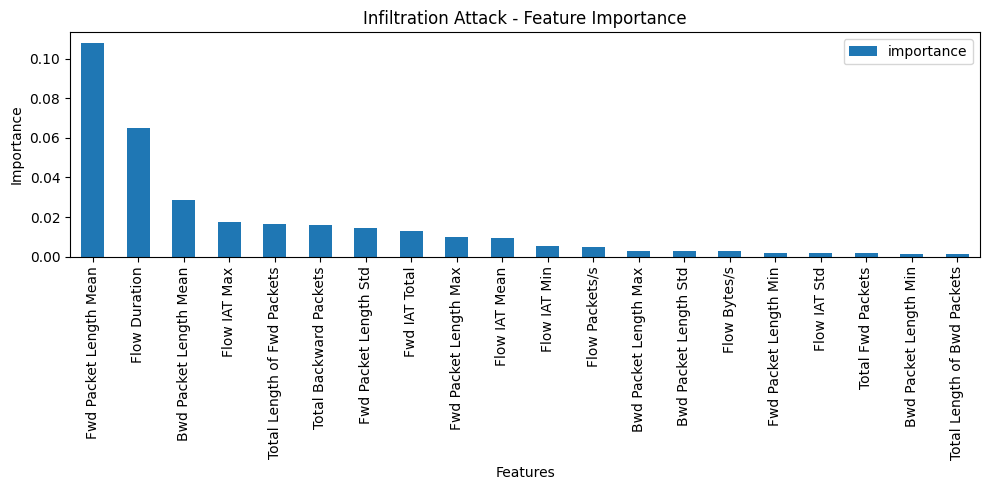

-----------------------------------------------------------------------------------------------




PortScan importance list:
                             importance
Features                               
Flow Bytes/s                   0.313346
Total Length of Fwd Packets    0.304169
Flow IAT Max                   0.000572
Flow Duration                  0.000466
Fwd IAT Total                  0.000362
Flow IAT Mean                  0.000196
Fwd Packet Length Max          0.000167
Bwd Packet Length Min          0.000035
Total Length of Bwd Packets    0.000030
Total Fwd Packets              0.000028
Bwd Packet Length Mean         0.000024
Flow Packets/s                 0.000023
Flow IAT Min                   0.000022
Flow IAT Std                   0.000021
Bwd Packet Length Std          0.000020
Bwd Packet Length Max          0.000017
Fwd Packet Length Mean         0.000011
Total Backward Packets         0.000008
Fwd Packet Length Std          0.000008
Fwd Packet Length Min          0.0

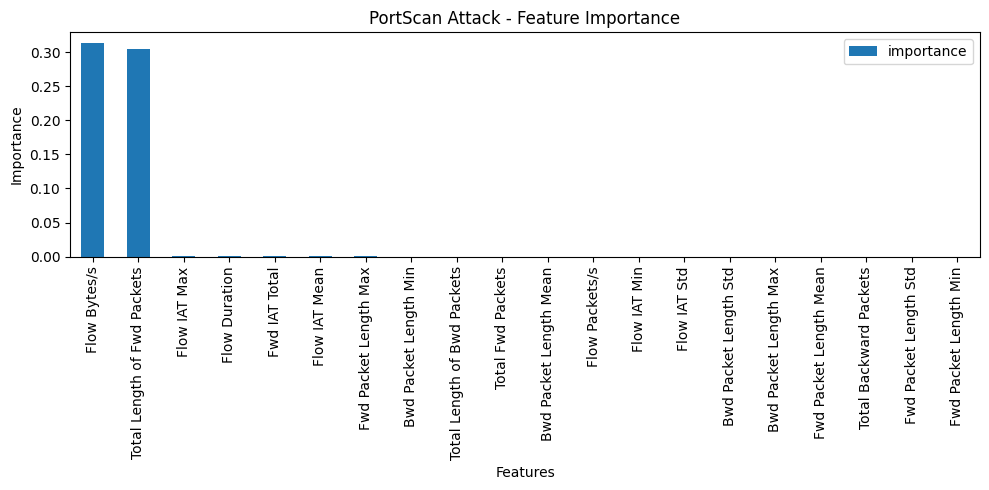

-----------------------------------------------------------------------------------------------




SSH-Patator importance list:
                             importance
Features                               
Fwd Packet Length Max          0.000810
Flow IAT Mean                  0.000681
Flow Packets/s                 0.000531
Flow IAT Std                   0.000451
Flow Duration                  0.000435
Total Length of Fwd Packets    0.000393
Flow IAT Max                   0.000341
Fwd IAT Total                  0.000263
Total Backward Packets         0.000180
Fwd Packet Length Std          0.000164
Fwd Packet Length Mean         0.000159
Flow IAT Min                   0.000115
Flow Bytes/s                   0.000097
Fwd Packet Length Min          0.000085
Total Fwd Packets              0.000042
Bwd Packet Length Min          0.000025
Total Length of Bwd Packets    0.000016
Bwd Packet Length Max          0.000015
Bwd Packet Length Mean         0.000011
Bwd Packet Length Std          

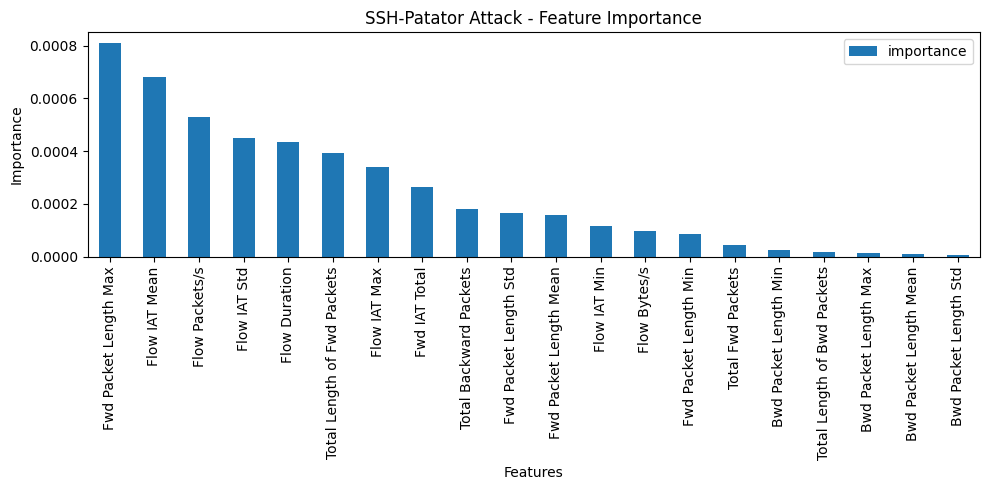

-----------------------------------------------------------------------------------------------




Web Attack importance list:
                             importance
Features                               
Bwd Packet Length Std          0.008650
Total Length of Fwd Packets    0.008147
Flow Bytes/s                   0.008023
Fwd Packet Length Mean         0.001795
Bwd Packet Length Max          0.001657
Flow IAT Max                   0.001517
Fwd Packet Length Max          0.001264
Fwd Packet Length Std          0.001101
Flow IAT Min                   0.000676
Flow IAT Mean                  0.000521
Flow Packets/s                 0.000516
Flow Duration                  0.000470
Total Fwd Packets              0.000303
Fwd IAT Total                  0.000277
Total Length of Bwd Packets    0.000158
Bwd Packet Length Mean         0.000094
Flow IAT Std                   0.000090
Total Backward Packets         0.000040
Bwd Packet Length Min          0.000038
Fwd Packet Length Min          0

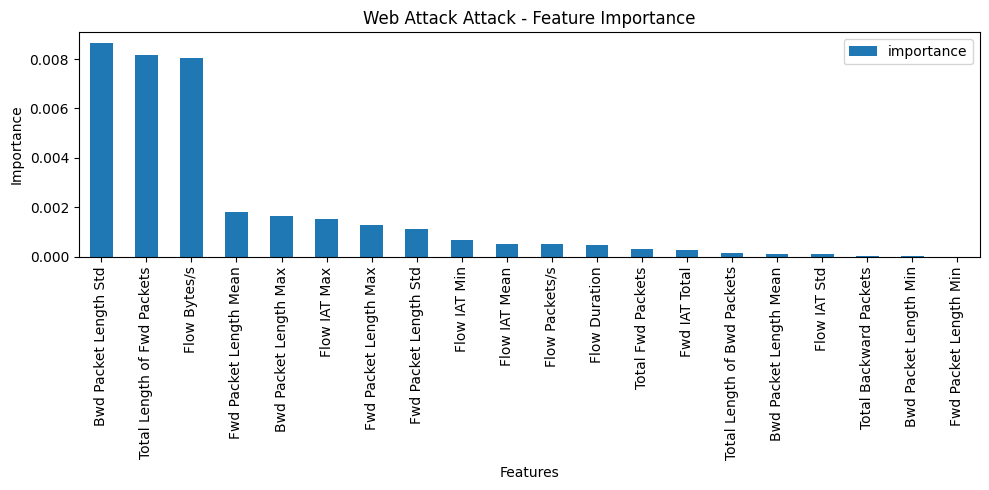

-----------------------------------------------------------------------------------------------






In [8]:
ths = open(os.path.join(base_path, "importance_list_for_attack_files.csv"), "w")

for j in csv_files:
    attack_file_path = os.path.join(base_path, "attacks", j)
    df = pd.read_csv(attack_file_path, usecols=main_labels)
    df = df.fillna(0)

    # Convert labels to binary
    df["Label"] = df["Label"].apply(lambda x: 1 if x == "BENIGN" else 0)

    y = df["Label"].values
    del df["Label"]
    X = df.values.astype(np.float32)

    # Replace NaN and inf values with 0
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0

    # Compute feature importances
    forest = RandomForestRegressor(n_estimators=250, random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol = list(df.columns.values)

    impor_bars = pd.DataFrame({'Features': refclasscol[0:20], 'importance': importances[0:20]})
    impor_bars = impor_bars.sort_values('importance', ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar()

    # Printing feature importances
    count = 0
    fea_ture = j[:-4] + "=["
    for i in impor_bars.index:
        fea_ture += f'"{i}",'
        count += 1
        if count == 5:
            fea_ture = fea_ture[:-1] + "]"
            break

    print(f"{j[:-4]} importance list:")
    print(impor_bars.head(20), "\n\n\n")
    print(fea_ture)

    plt.title(j[:-4] + " Attack - Feature Importance")
    plt.ylabel('Importance')

    # Save plot to Google Drive
    plt.savefig(os.path.join(base_path, "feature_pics", j[:-4] + ".pdf"),
            bbox_inches='tight', format='pdf')


    ths.write(fea_ture)
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

In [9]:
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()

Total operation time: =  6919.749884843826 seconds
